End to End Toy Project

steps to be performed

--> preprocess + EDA + Feature Selection

--> Extract input and Output cols 

--> Scale the values 

--> train test split 

--> train the model

--> Evaluate the model/ model selection 

--> deploy the model

In [116]:
import numpy as np
import pandas as pd 
data = pd.read_csv(r"D:\MILLION\Machine learning\placement.csv")
data.head()         # outputs first 5 rows 

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [117]:
data.shape            # gives number of rows , columns 

(100, 4)

let's have a check whether any column consits of missing value 

In [118]:
data.info()
# the results shows that there is o missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


preprocessing : 
there is an column named unnamed.
this has to be removed.

In [119]:
data = data.iloc[: , 1:]     # take all the rows .
#take all the columns from the 2nd column
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Doing EDA stuff now 

'\nafter plotting , we can see datasets : placed vs non-placed can be \ndivided using logistic regression (S-curve)\n'

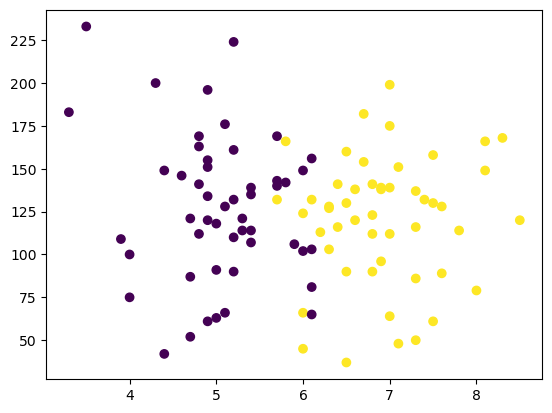

In [120]:
import matplotlib.pyplot as plt

#below code shows who are placed , the people yellow in color are placed 
plt.scatter( data['cgpa'] , data['iq'] , c = data['placement'] )    #syntax: x,y,color

'''
after plotting , we can see datasets : placed vs non-placed can be 
divided using logistic regression (S-curve)
'''

for now feature selection is not required.

seperating input ( independent (assumption)) and output

In [121]:
# storing independent in data_in
data_in = data.iloc[ : , :2 ]          #all the rows , columns from 0 to 1
data_in

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [122]:
# storing dependent in data_de
data_de = data.iloc[ : , -1]        # all the rows and last column
data_de

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

 now : train test split 

In [123]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data_in , data_de , test_size =0.1)
# this means 10 percent of the entire will be used for testing purpose and rest 90% for training 
'''
In output:
    --> 1st stuff : data_in of training set
    --> 2nd stuff : data_in of test set
    --> 3rd stuff : data_de of training set
    --> 4th stuff : data_in of test set
'''

'\nIn output:\n    --> 1st stuff : data_in of training set\n    --> 2nd stuff : data_in of test set\n    --> 3rd stuff : data_de of training set\n    --> 4th stuff : data_in of test set\n'

In [124]:
x_train

,cgpa,iq
96,4.4,42.0
13,6.4,116.0
24,4.7,121.0
56,6.1,65.0
86,5.1,128.0
...,...,...
94,4.7,52.0
23,4.7,87.0
34,4.8,163.0
76,4.9,155.0


In [125]:
x_test

,cgpa,iq
68,4.0,75.0
10,6.0,45.0
17,3.3,183.0
9,5.1,66.0
16,5.2,224.0
50,3.5,233.0
70,6.3,127.0
6,5.7,143.0
55,7.8,114.0
12,5.4,139.0


In [126]:
y_train

96    0
13    1
24    0
56    0
86    0
     ..
94    0
23    0
34    0
76    0
33    0
Name: placement, Length: 90, dtype: int64

In [127]:
y_test

68    0
10    1
17    0
9     0
16    0
50    0
70    1
6     0
55    1
12    0
Name: placement, dtype: int64

⚙️ What is "Scaling the Input"?

Scaling means transforming your input features so they fall within a specific range or distribution

Example: If your sensor gives temperature in °C ranging from 0 to 100, scaling might convert it to a 0–1 range


🧠 Why Only Inputs Are Scaled (Not Outputs)?

In supervised learning, inputs (X) are scaled because:

• 	Many algorithms (like SVM, k-NN, gradient descent-based models) are sensitive to feature magnitude.

• 	Scaling ensures equal contribution from all features.

• 	It speeds up convergence and improves accuracy.



Outputs (y) are typically not scaled because:

• 	They represent the target variable — the value you're trying to predict.

• 	Scaling them can distort the meaning of predictions (e.g., predicting a scaled temperature instead of actual °C).

• 	Exceptions exist: in regression tasks, you might scale  if you're using models that benefit from it (like neural networks), but you must inverse-transform the predictions afterward.

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()              # object is created
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.54242873, -2.20284072],
       [ 0.29866657, -0.17338724],
       [-1.26626444, -0.03626201],
       [ 0.02250228, -1.57206464],
       [-0.89804538,  0.15571332],
       [ 0.85099516,  0.45738884],
       [ 0.7589404 ,  0.42996379],
       [ 0.4827761 , -0.06368705],
       [ 0.4827761 ,  0.42996379],
       [-0.62188108,  0.34768865],
       [ 1.40332375, -0.91386351],
       [ 2.04770711,  1.2527152 ],
       [ 0.11455704, -0.25566238],
       [-1.91064779, -0.61218799],
       [ 1.21921422,  0.26541351],
       [ 0.57483087,  1.63666586],
       [-0.80599061, -0.33793752],
       [ 1.86359758,  1.19786511],
       [-1.08215491,  0.3202636 ],
       [ 0.7589404 ,  0.45738884],
       [ 0.66688563,  0.51223893],
       [ 0.20661181,  0.15571332],
       [ 0.39072134,  1.03331483],
       [ 1.77154281, -1.18811398],
       [-0.06955249, -1.54463959],
       [-0.80599061,  1.06073987],
       [ 1.12715946, -0.99613865],
       [-0.06955249,  0.04601313],
       [ 0.02250228,

In [129]:
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.94780975, -0.98641893],
       [ 0.59334432, -1.48045178],
       [-1.48721368,  0.79209934],
       [-0.10017501, -1.13462878],
       [-0.02311731,  1.46727757],
       [-1.33309827,  1.61548742],
       [ 0.82451743, -0.13009532],
       [ 0.36217121,  0.13338887],
       [ 1.98038298, -0.34417622],
       [ 0.1309981 ,  0.06751782]])

now we train the model using logistic regresion classifier 

In [130]:
from sklearn.linear_model import LogisticRegression

# making LogicticRegression object.  this obeject can access all the functions inside 
# LogisticRegression class

clf = LogisticRegression()

In [131]:
# fit() : trains the model
clf.fit(x_train , y_train)         # model get trained


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model Evaluation : we find accuracy on test data 

In [132]:
y_predict= clf.predict(x_test)          # the model will predict the output based on input : x_train
y_predict

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [133]:
y_test
# compare both the results 

68    0
10    1
17    0
9     0
16    0
50    0
70    1
6     0
55    1
12    0
Name: placement, dtype: int64

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_predict)
# so 80% accurately the model is been trained 

0.7

In [135]:
# %pip install mlxtend

plotting decision boundary

<Axes: >

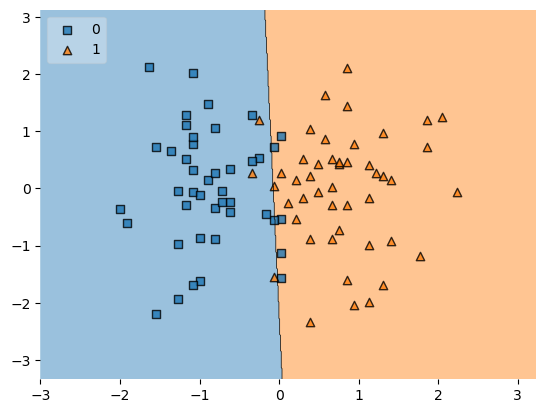

In [136]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train , y_train.values , clf = clf , legend =2 )

# .values converts pandas series to array.
# input to plot_decison_regions are arrays type 
# the mid vertical line passing through is the bundary

in python everything is an object , we can use it convert to file to use it any enviroment.

can be done using pickle library

In [137]:
import pickle
pickle.dump( clf , open('model.pkl', 'wb'))       

🧠 What Is pickle?

pickle is a built-in Python module used for serializing and deserializing Python objects — meaning it can convert objects into a byte stream (save to file), and later load them back into memory.

pickle.dump(clf, open('model.pkl', 'wb'))

This line does three things:


1. clf
This is your trained classifier object (e.g., LogisticRegression, RandomForestClassifier, etc.)

It contains all learned parameters, hyperparameters, and methods.

2. open('model.pkl', 'wb')
Opens a file named model.pkl in write-binary mode ('wb')

This is where the serialized model will be saved

3. pickle.dump(...)
Serializes the clf object and writes it to model.pkl

The result is a binary file that stores your trained model


✅ Why This Is Useful:
You don’t need to retrain the model every time — just load it with:

python
clf = pickle.load(open('model.pkl', 'rb'))

Perfect for deployment, sharing, or versioning your ML pipeline